# Rail Editor v0.2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy import array
import ipywidgets
import IPython
from IPython.core.display import display, HTML

In [3]:
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
from flatland.utils.editor import EditorMVC, EditorModel, View, Controller

cpu


In [5]:
mvc = EditorMVC(sGL="PIL")

<Figure size 720x720 with 0 Axes>

## Instructions
- Drag to draw
  - improved dead-ends
- Shift-Drag to erase rails
  - erasing dead ends not yet automated - drag right across them
- ctrl-click to add agent
  - direction chosen randomly to fit rail
- ctrl-shift-click to add target for last agent
  - target can be moved by repeating 

In [6]:
mvc.view.display()

In [7]:
mvc.view.wOutput.clear_output()
mvc.view.wOutput

Output()

In [8]:
mvc.editor.env.get_agent_handles()

[]

In [9]:
mvc.editor.env._get_observations()

{}

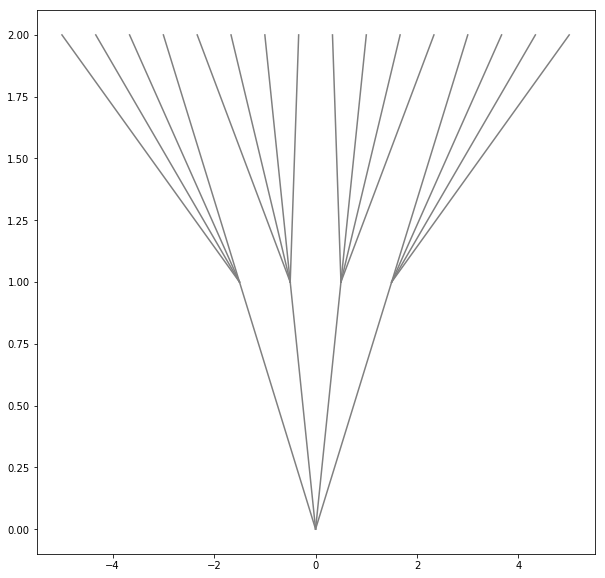

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#ipv.view(0, 90, 1)
nBranchFactor = 4

# A point in xyz representing the root node
gP0 = array([[0,0,0]]).T
nDepth = 3

# iterate over layers / depths:
for i in range(nDepth):
    nDepthNodes = nBranchFactor**i   # number of nodes at this depth
    rScale = nBranchFactor ** (nDepth - i)
    rShrinkDepth = 1/(i+1)    # shrink the horizontal scale as we go deeper

    # x,y,z coords for the nodes
    gX1 = np.linspace(-(nDepthNodes-1), (nDepthNodes-1), nDepthNodes) * rShrinkDepth
    gY1 = np.ones((nDepthNodes)) * i
    gZ1 = np.zeros((nDepthNodes))
    
    #ipv.scatter(gX1, gZ1, -gY1, marker="sphere")
    
    #gP0rep = np.repeat(gP0, nBranchFactor, axis=1)
    
    # All the new points
    gP1 = array([gX1, gY1, gZ1])
    
    # The points from both the previous depth and this one
    gP01 = np.append(gP0, gP1, axis=1)
    
    if nDepthNodes > 1:
        nDepthNodesPrev = nDepthNodes / nBranchFactor
        giP0 = np.repeat(np.arange(nDepthNodesPrev), nBranchFactor)
        giP1 = np.arange(0, nDepthNodes) + nDepthNodesPrev
        giLinePoints = np.stack([giP0, giP1]).ravel("F")
        #print(gP01[:,:10])
        #print(giLinePoints)
        for iLine in range(0, len(giLinePoints), 2):
            iP0 = int(giLinePoints[iLine])
            iP1 = int(giLinePoints[iLine+1])
            p0 = [ gP01[0, iP0], gP01[1, iP0] ]
            p1 = [ gP01[0, iP1], gP01[1, iP1] ]
            
            gLine = array([p0, p1]).T
            #print(p0, p1, gLine)
            #plt.plot(gP01[0], gP01[2], -gP01[1], lines=giLinePoints, color="gray")
            plt.plot(*gLine, color="gray")
            #ipv.plot(gP01[0], gP01[2], -gP01[1], lines=giLinePoints)

    gP0 = array([gX1, gY1, gZ1])
    